# Comparing Phase and amplitudes of the annual and semi-annual cycles between Ifremer swh and CCMP2 wsp 

In [1]:
%matplotlib inline

Use the sys library in order to tell the notebook to look for files within the followinf directory path: 

In [2]:
import sys
sys.path.append('/zdata/home/lcolosi/python_functions/')

Import all libraries and functions

In [3]:
#libraries
import numpy as np #contains the major of functions used for matrix arrays  
import matplotlib.pyplot as plt # matplotlib contains functions for graphics and plot manipulation
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files
import datetime
#plotting libraries
import cmocean.cm as cmo
from matplotlib import cm 
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import ticker
import matplotlib
from numpy import pi


#my functions
from unweighted_least_square_fit import least_square_fit 
from char_LSF_curve import character_LSF
from monthly_mean import monthly_average
import cartopy_fig_module as cart
from phase_fraction import phase_fraction

Import data for Ifremer SWH and CCMP2 WSP Characteristics from .npz files 

In [4]:
ifremer_swh = np.load('/zdata/downloads/colosi_data_bk/binned_data/ifremer_p1_daily_data/my_daily_binned_ifremer_data/char_lsf_5par_npz/ifremer_swhcor_char.npz')
ccmp2_wsp = np.load('/zdata/downloads/colosi_data_bk/binned_data/ccmpv2_wind_data/daily_binned_ccmp_v2_data/char_lsf_5par_npz/ccmp2_wsp_char_lsf.npz')

Redefine variables 

In [5]:
#For ifremer swh
swh_amp1_m = ifremer_swh['swh_annual_amp']
swh_phase1_m = ifremer_swh['swh_annual_phase']
swh_amp2_m = ifremer_swh['swh_semi_annual_amp']
swh_phase2_m = ifremer_swh['swh_semi_annual_phase']
swh_cod_m = ifremer_swh['swh_cod']

#For CCMP2 wsp 
wsp_amp1_m = ccmp2_wsp['wsp_annual_amp']
wsp_phase1_m = ccmp2_wsp['wsp_annual_phase']
wsp_amp2_m = ccmp2_wsp['wsp_semi_annual_amp']
wsp_phase2_m = ccmp2_wsp['wsp_semi_annual_phase']
wsp_cod_m = ccmp2_wsp['wsp_cod']

Set spatial variables 

In [6]:
lon = np.arange(0,360,1)
lat = np.arange(-66,67,1)

Replot the characteristics of the least square fit where there is a juxatoposition between Ifremer swh and CCMP2 wsp 

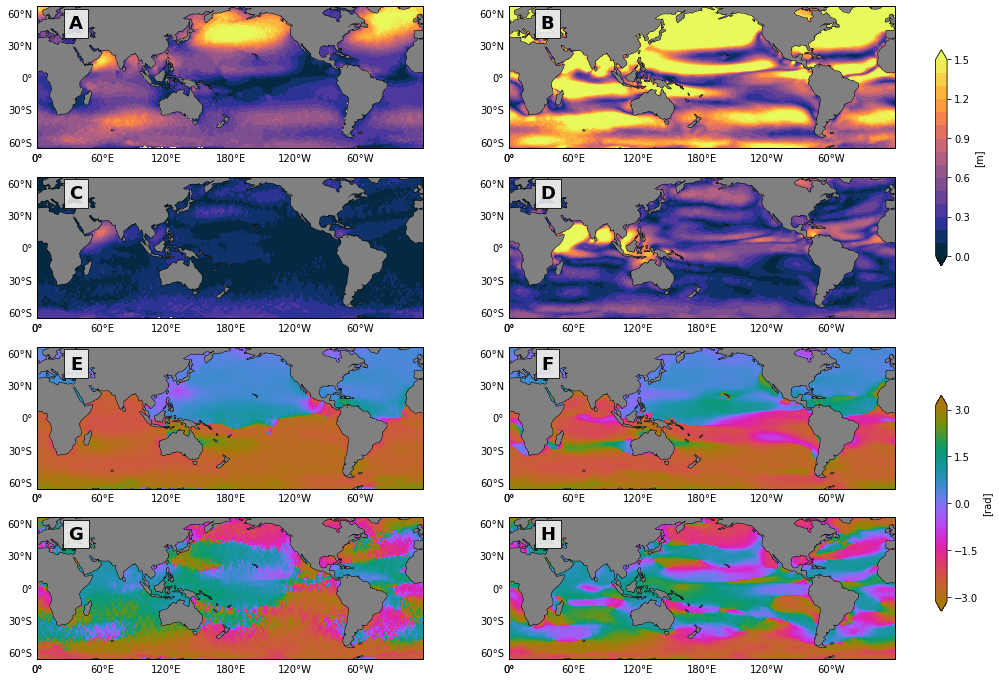

In [7]:
import cartopy.feature as cfeature

projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '110m'

fig, axes = plt.subplots(4, 2, figsize=(16,12),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

############## Subplot 1  #################
cart.set_subplots(ax1, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1.6, 0.1)
cs1 = ax1.contourf(lon, lat, swh_amp1_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax1,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#left, bottom, width, height
#cax1 = plt.axes([.47, .80, 0.01, 0.16])
#cart.set_cbar(cs1, cax1, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)

############## Subplot 2  #################
cart.set_subplots(ax2, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs2 = ax2.contourf(lon, lat, wsp_amp1_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax2,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax2 = plt.axes([.92, .71, 0.01, 0.16])
cax2 = plt.axes([.92, .58, 0.01, 0.25])
cart.set_cbar(cs2, cax2, fig, orientation='vertical', cbar_label ='[m]', nbins = 5, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax2, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)

############## Subplot 3  #################
cart.set_subplots(ax3, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs3 = ax3.contourf(lon, lat, swh_amp2_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax3, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax3 = plt.axes([.47, .42, 0.01, 0.16])
#cart.set_cbar(cs3, cax3, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax3, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 18)

############## Subplot 4  #################
cart.set_subplots(ax4, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs4 = ax4.contourf(lon, lat, wsp_amp2_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax4, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax4 = plt.axes([.92, .52, 0.01, 0.16])
#cart.set_cbar(cs4, cax4, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax4, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax4, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'D', fs_shade = 28, fs_main = 18)

############## Subplot 5  #################
cart.set_subplots(ax5, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs5 = ax5.pcolor(lon, lat, swh_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax5, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax5 = plt.axes([.47, .17, 0.01, 0.16])
#cart.set_cbar(cs5, cax5, fig, cbar_label ='[rad]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax5, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 18)

############## Subplot 6  #################
cart.set_subplots(ax6, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs6 = ax6.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax6, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax6 = plt.axes([.92, .32, 0.01, 0.16])
cax6 = plt.axes([.92, .18, 0.01, 0.25])
cart.set_cbar(cs6, cax6, fig, orientation='vertical', cbar_label ='[rad]', nbins = 5, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax6, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax6, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'F', fs_shade = 28, fs_main = 18)

############## Subplot 7  #################
cart.set_subplots(ax7, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs7 = ax7.pcolor(lon, lat, swh_phase2_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax7, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax7 = plt.axes([.47, .06, 0.01, 0.16])
#cart.set_cbar(cs7, cax7, fig, cbar_label ='[rad]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax7, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax7, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'G', fs_shade = 28, fs_main = 18)

############## Subplot 8  #################
cart.set_subplots(ax8, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs8 = ax8.pcolor(lon, lat, wsp_phase2_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax8, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax8 = plt.axes([.92, .13, 0.01, 0.16])
#cart.set_cbar(cs8, cax8, fig, cbar_label ='[rad]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax8, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
#ax8.text(0.5, -0.21, 'Longitude', va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax8.transAxes, fontsize=15)
cart.subplot_label(ax8, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'H', fs_shade = 28, fs_main = 18)

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.12, hspace = 0.2)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/lsf_figs/ccmp2_ifremer_lsf_characteristics_5_par_fit_cbc', bbox_inches = 'tight', dpi=300)

Plot a comparison between coefficients of determination 

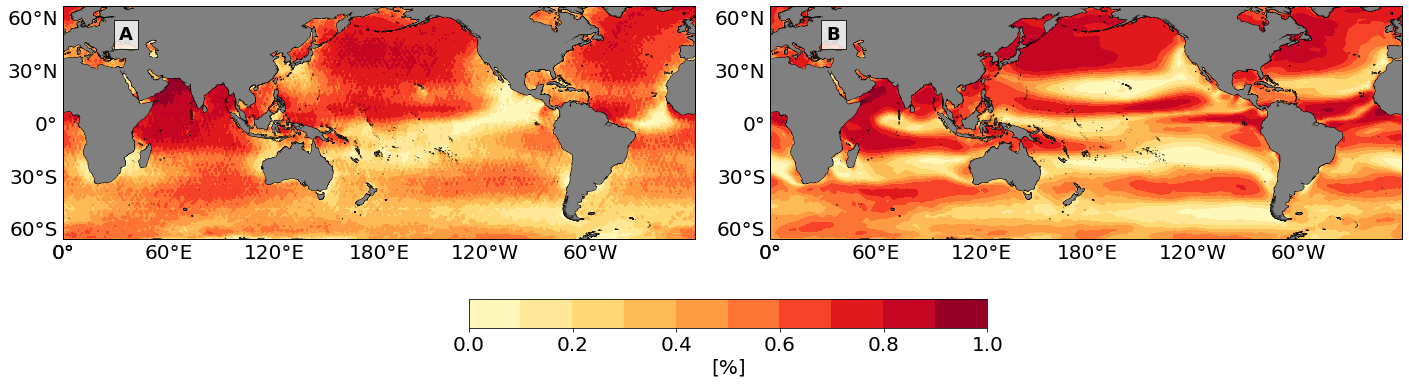

In [8]:
import cartopy.feature as cfeature

projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

fig, axes = plt.subplots(1, 2, figsize=(24,20),
                        subplot_kw={'projection': projection})
ax1, ax2 = axes.flatten()

############## Subplot 1  #################
cart.set_subplots(ax1, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1.1, 0.1)
cs1 = ax1.contourf(lon, lat, swh_cod_m, levels=levels, cmap=cm.YlOrRd,
                  extend='neither', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax1,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=20, color = 'black')
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)

############## Subplot 2  #################
cart.set_subplots(ax2, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.1, 0.1)
cs2 = ax2.contourf(lon, lat, wsp_cod_m, levels=levels, cmap=cm.YlOrRd,
                  extend='neither', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax2,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=20, color = 'black')
cax2 = plt.axes([.36, .36, 0.3, 0.02])
cart.set_cbar(cs2, cax2, fig, orientation='horizontal', cbar_label ='[%]', nbins = 5, fontsize = 20, cbar_ticks=[], task='regular')
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.12, hspace = 0.2)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/lsf_figs/ccmp2_ifremer_goodness_of_fit_5_par', bbox_inches = 'tight', dpi=300)


### Replot Phase and amplitude parameters for annual and semi-annual cycle with phase color bar in months 

In [9]:
def set_cbar(cs, cax, fig, orientation, cbar_label, nbins, fontsize, cbar_ticks, task):
    
    """
    set_cbar(cs, cax, fig, cbar_label, nbins, fontsize)
    
        Function for placing colorbar on a plot
        
        Parameters 
        ----------
        cs : map of data on subplot axis using cartopy projection 
               e.g. cs = ax.pcolor(lon,lat,swh_phase2_m,vmin=-np.pi,vmax=np.pi, cmap=cm.hsv, transform=ccrs.PlateCarree(central_longitude=0.0))
        cax : colorbar axis with positioning vector of the colorbar with the folowing parameters: 
               cax = plt.axes([left, bottom, width, height])
               e.g. cax = plt.axes([.47, .17, 0.01, 0.16])
        fig : fig with the colorbar will attached to (not refering to the subplots)
        orientation : Specifies if the colorbar is vertical or horizontal. Options for keyword argument includes: 
               e.g. orientation = 'horizontal' or orientation = 'vertical'
        cbar_label : colobar label in string format 
               e.g. cbar_label = '[m]'
        fontsize : font size of cbar label and tickmarks
               e.g. fontsize = 10
        nbins : number of tick marks on colorbar axis 
               e.g. nbins = 5
        cbar_ticks : A list of tick marks that will be placed on colorbar (note that the number of tick mark labels must be equal to the number of bins on color bar)
               e.g. cbar_ticks = [np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),[Jun, Aug, October, Dec, Feb, Apr, June]]
        task : Specifies whether the colorbar will need to be maodified with custom tick marks. Options include: 
                task = 'custom ticks' or task = 'regular'
              
        Returns
        -------
        plots with subplot labels on the left and top corner (or any disired location)
    
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        from matplotlib import ticker
    
    """
    
    #create colorbar for plot
    if task == 'regular':
        cbar = fig.colorbar(cs, cax=cax, orientation=orientation, extend='both')
    elif task == 'custom ticks':
        cbar = fig.colorbar(cs, cax=cax, orientation=orientation, ticks=cbar_ticks[0], extend='both')
    #set the number of tickmarks on colorbar
    #tick_locator = ticker.MaxNLocator(nbins=nbins)
    #cbar.locator = tick_locator 
    #cbar.update_ticks()
    #case 1: vertical colorbar
    if orientation == 'vertical':
        cbar.ax.set_ylabel('%s' %cbar_label, fontsize=fontsize)
        if task == 'custom ticks':
            #cbar.set_ticks(cbar.locator)
            cbar.ax.set_yticklabels(cbar_ticks[1])
    #case 2: horizontal colorbar
    elif orientation == 'horizontal':
        cbar.ax.set_xlabel('%s' %cbar_label, fontsize=fontsize)
        if task == 'custom ticks':
            #cbar.set_ticks(cbar.locator)
            cbar.ax.set_xticklabels(cbar_ticks[1])
    #set the fontsize of colorbar tickmarks
    cbar.ax.tick_params(labelsize=fontsize) 
    
    return

Poster plot of Characteristics of SWH and WSP

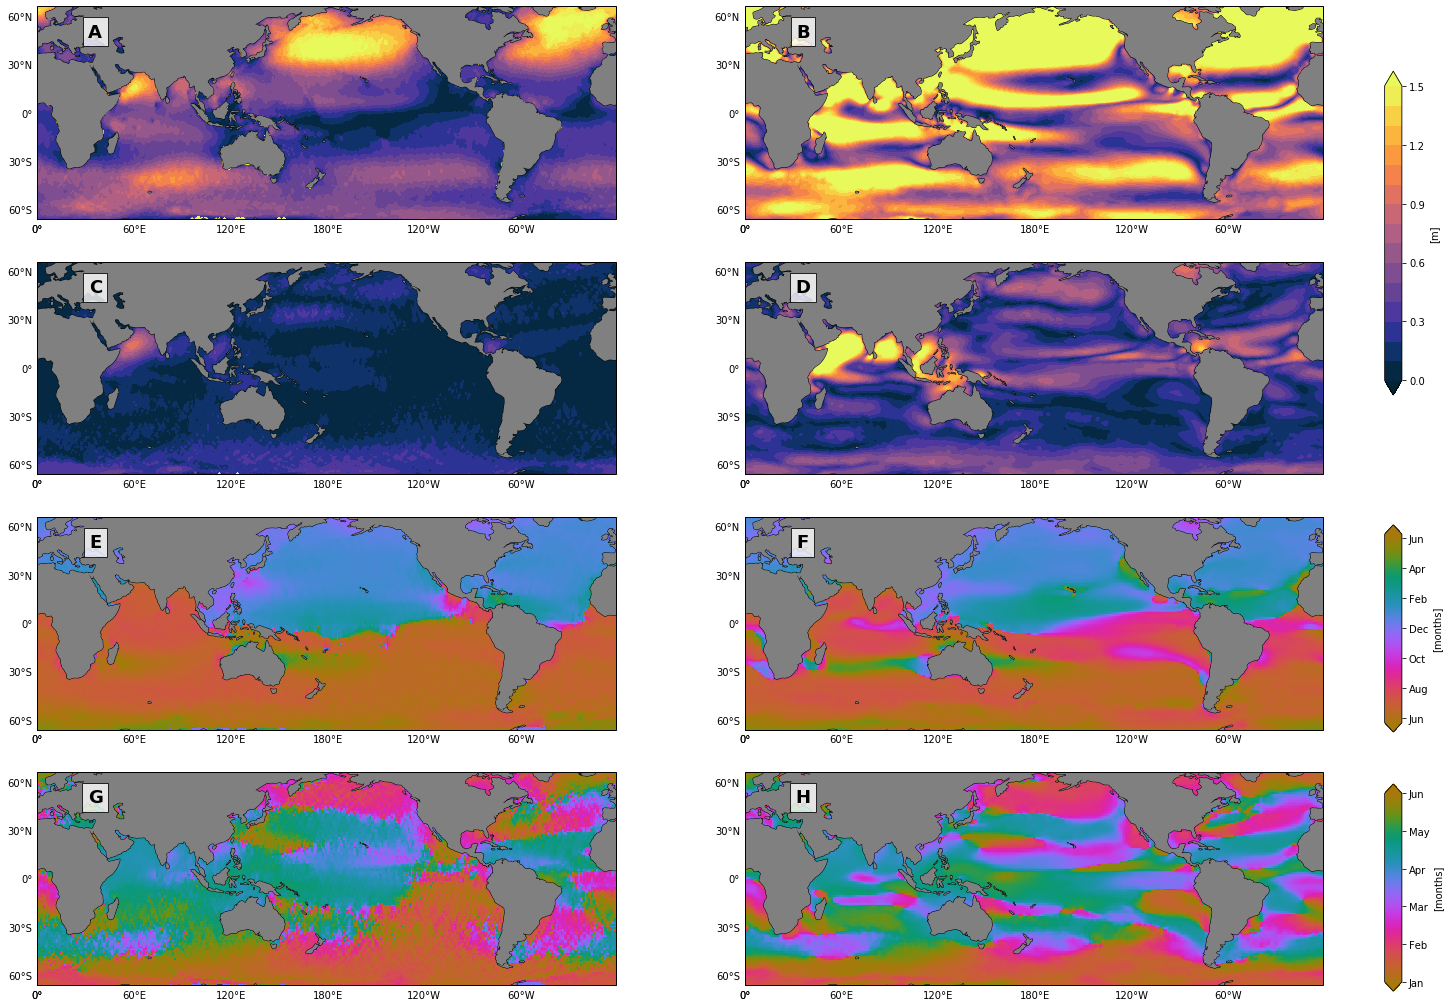

In [10]:
import cartopy.feature as cfeature

projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '110m'

fig, axes = plt.subplots(4, 2, figsize=(24,18),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

############## Subplot 1  #################
cart.set_subplots(ax1, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1.6, 0.1)
cs1 = ax1.contourf(lon, lat, swh_amp1_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax1,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#left, bottom, width, height
#cax1 = plt.axes([.47, .80, 0.01, 0.16])
#cart.set_cbar(cs1, cax1, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)

############## Subplot 2  #################
cart.set_subplots(ax2, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs2 = ax2.contourf(lon, lat, wsp_amp1_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax2,xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax2 = plt.axes([.92, .71, 0.01, 0.16])
cax2 = plt.axes([.92, .58, 0.01, 0.25])
cart.set_cbar(cs2, cax2, fig, orientation='vertical', cbar_label ='[m]', nbins = 5, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax2, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)

############## Subplot 3  #################
cart.set_subplots(ax3, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs3 = ax3.contourf(lon, lat, swh_amp2_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax3, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax3 = plt.axes([.47, .42, 0.01, 0.16])
#cart.set_cbar(cs3, cax3, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax3, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 18)

############## Subplot 4  #################
cart.set_subplots(ax4, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0.0, 1.6, 0.1)
cs4 = ax4.contourf(lon, lat, wsp_amp2_m, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax4, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax4 = plt.axes([.92, .52, 0.01, 0.16])
#cart.set_cbar(cs4, cax4, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax4, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax4, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'D', fs_shade = 28, fs_main = 18)

############## Subplot 5  #################
cart.set_subplots(ax5, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs5 = ax5.pcolor(lon, lat, swh_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax5, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax5 = plt.axes([.47, .17, 0.01, 0.16])
#cart.set_cbar(cs5, cax5, fig, cbar_label ='[rad]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax5, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 18)

############## Subplot 6  #################
cart.set_subplots(ax6, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs6 = ax6.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax6, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cax6 = plt.axes([.92, .32, 0.01, 0.16])
#cax6 = plt.axes([.92, .18, 0.01, 0.25])
cart.set_cbar(cs6, cax6, fig, orientation='vertical', cbar_label ='[months]', nbins = 7, fontsize = 10, cbar_ticks=[np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),['','Jun', 'Aug', 'Oct', 'Dec', 'Feb', 'Apr', 'Jun']], task='custom ticks')
#cart.set_axes_label(ax6, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax6, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'F', fs_shade = 28, fs_main = 18)

############## Subplot 7  #################
cart.set_subplots(ax7, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs7 = ax7.pcolor(lon, lat, swh_phase2_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax7, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
#cax7 = plt.axes([.47, .06, 0.01, 0.16])
#cart.set_cbar(cs7, cax7, fig, cbar_label ='[rad]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax7, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax7, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'G', fs_shade = 28, fs_main = 18)

############## Subplot 8  #################
cart.set_subplots(ax8, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs8 = ax8.pcolor(lon, lat, wsp_phase2_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax8, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cax8 = plt.axes([.92, .12, 0.01, 0.16])
set_cbar(cs8, cax8, fig, orientation='vertical', cbar_label ='[months]', nbins = 7, fontsize = 10, cbar_ticks=[np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/5).tolist(), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']], task='custom ticks')
#cart.set_axes_label(ax8, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
#ax8.text(0.5, -0.21, 'Longitude', va='bottom', ha='center',
#        rotation='horizontal', rotation_mode='anchor',
#        transform=ax8.transAxes, fontsize=15)
cart.subplot_label(ax8, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'H', fs_shade = 28, fs_main = 18)

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.12, hspace = 0.2)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/lsf_figs/ccmp2_ifremer_lsf_characteristics_5_par_fit_paper', bbox_inches = 'tight', dpi=300)

### Quantifying the precentage of the earth that experiences a wind anomaly similar to the california coast where the wind climatology within a specific region is out of phase with the rest of the hemisphere

Compute the following fractions: 

1) Percent of near coastal regions experiencing wind anomaly (<550km off shore) 

2) Precent of open ocean regions experiencing wind anomaly (>550km off shore) 

3) Precent of total ocean experiencing wind anomaly 

Note that all regions that have out of phase wsp seasonal cycles may not occur due to the same wind anomaly mechanics as the california coast. In addition, the WSP climate in these regions will effect the wave field based on the region's exposure to remotely forced waves.


Partition the world into the following 5 regions: 

1) Indian Ocean 

2) North Pacific 

3) South Pacific

4) North Atlantic

5) South Atlantic 


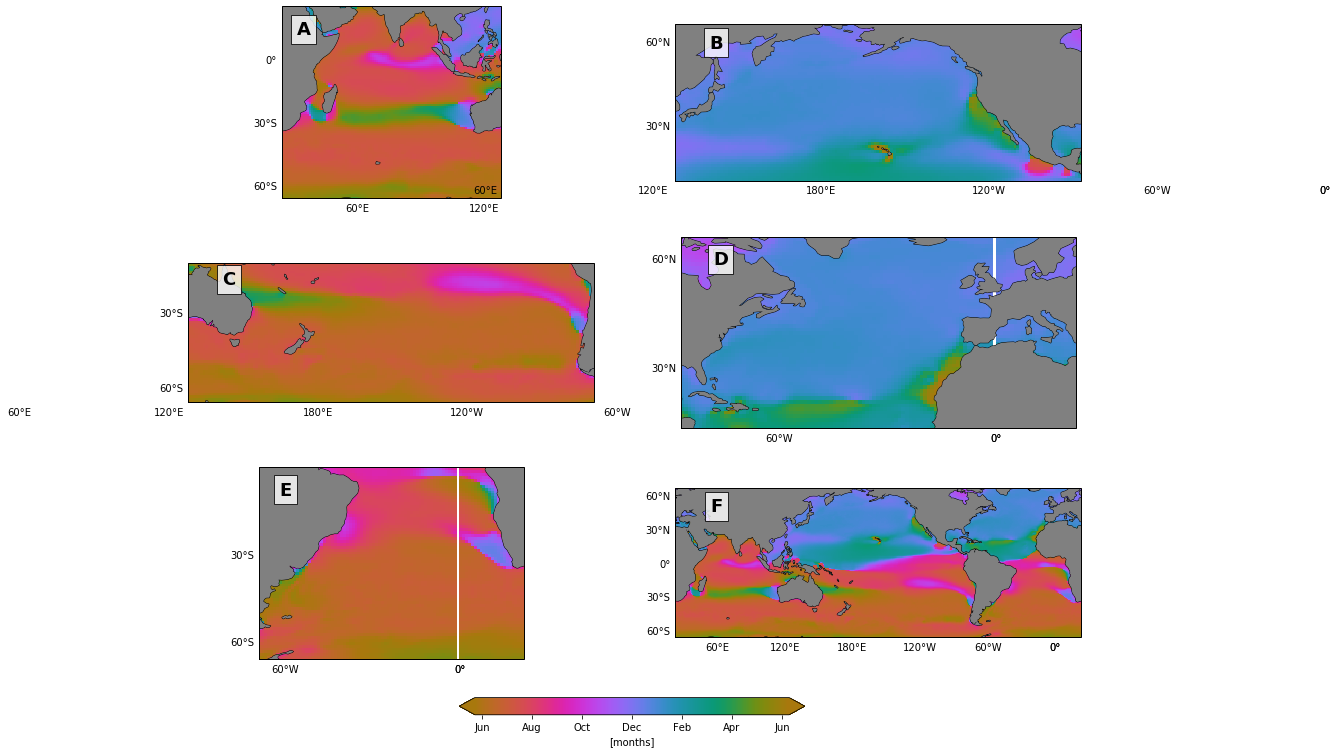

In [65]:
projection = ccrs.PlateCarree(central_longitude=-157.0)
resolution = '110m'

fig, axes = plt.subplots(3,2, figsize=(16,12),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

############## Subplot 1  #################
#Indian Ocean 
cart.set_subplots(ax1, projection, resolution, lon_min=-179, lon_max=-75, lat_min=-66, lat_max=25)
cs1 = ax1.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax1, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cax1 = plt.axes([.36, .06, 0.3, 0.02])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[months]', nbins = 7, fontsize = 10, cbar_ticks=[np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),['','Jun', 'Aug', 'Oct', 'Dec', 'Feb', 'Apr', 'Jun']], task='custom ticks')
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)

############## Subplot 2  #################
#North Pacific 
cart.set_subplots(ax2, projection, resolution, lon_min=-75, lon_max=70, lat_min=10, lat_max=66)
cs2 = ax2.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax2, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)

############## Subplot 3  #################
#South Pacific
cart.set_subplots(ax3, projection, resolution, lon_min=-75, lon_max=88, lat_min=-66, lat_max=-10)
cs3 = ax3.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax3, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 18)

############## Subplot 4  #################
#North Atlantic
cart.set_subplots(ax4, projection, resolution, lon_min=70, lon_max=179, lat_min=13, lat_max=66)
cs4 = ax4.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax4, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax4, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'D', fs_shade = 28, fs_main = 18)

############## Subplot 5  #################
#South Atlantic
cart.set_subplots(ax5, projection, resolution, lon_min=88, lon_max=179, lat_min=-66, lat_max=0)
cs5 = ax5.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax5, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 18)

############## Subplot 6  #################
#Entire world
cart.set_subplots(ax6, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cs6 = ax6.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax6, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax6, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'F', fs_shade = 28, fs_main = 18)


Apply the mask of the continents from Ifremer 

In [8]:
#set all continent phase values equal to zero to masked points
swh_phase = np.ma.masked_equal(swh_phase1_m, 0)
#get mask 
swh_mask = np.ma.getmask(swh_phase)
#apply to WSP
wsp_phase1_m = np.ma.masked_where(swh_mask, wsp_phase1_m)

Partition the annual phase array into separate arrays for each of the regions above

In [9]:
n_indian = wsp_phase1_m[59:95,40:105]
s_indian = wsp_phase1_m[0:60,23:132]
n_pacific = wsp_phase1_m[75:133,106:275]
s_pacific = wsp_phase1_m[0:60,131:292]
n_atlantic = wsp_phase1_m[77:133,274:355]
s_atlantic_w = wsp_phase1_m[0:68,291:360]
s_atlantic_e = wsp_phase1_m[0:68,0:24]

Inspect the region that will be plotted as a histogram

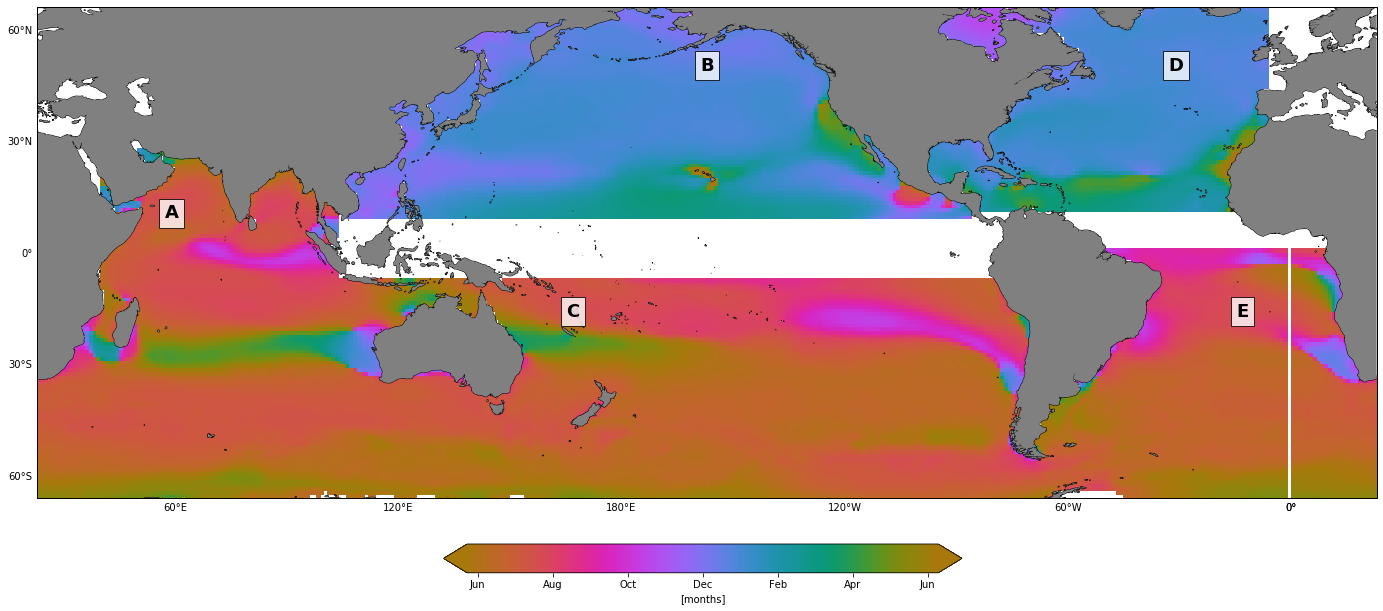

In [27]:
projection = ccrs.PlateCarree(central_longitude=-157.0)
resolution = '50m'

fig, axes = plt.subplots(1,1, figsize=(24,20),
                        subplot_kw={'projection': projection})

############## Partitioned World Oceans  ################# 
cart.set_subplots(axes, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
#North indian ocean
lat_reg = lat[59:95]
lon_reg = lon[40:105]
cs1 = axes.pcolor(lon_reg, lat_reg, n_indian, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#South Indian Ocean 
lat_reg = lat[0:60]
lon_reg = lon[23:132]
cs2 = axes.pcolor(lon_reg, lat_reg, s_indian, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#north pacific
lat_reg = lat[75:133]
lon_reg = lon[106:275]
cs3 = axes.pcolor(lon_reg, lat_reg, n_pacific, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#south pacific
lat_reg = lat[0:60]
lon_reg = lon[131:292]
cs4 = axes.pcolor(lon_reg, lat_reg, s_pacific, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#North Atlantic
lat_reg = lat[77:133]
lon_reg = lon[274:355]
cs5 = axes.pcolor(lon_reg, lat_reg, n_atlantic, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#South Atlantic West
lat_reg = lat[0:68]
lon_reg = lon[291:360]
cs6 = axes.pcolor(lon_reg, lat_reg, s_atlantic_w, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
#South Atlantic East
lat_reg = lat[0:68]
lon_reg = lon[0:24]
cs6 = axes.pcolor(lon_reg, lat_reg, s_atlantic_e, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))

cax1 = plt.axes([.36, .28, 0.3, 0.02])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[months]', nbins = 7, fontsize = 10, cbar_ticks=[np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),['','Jun', 'Aug', 'Oct', 'Dec', 'Feb', 'Apr', 'Jun']], task='custom ticks')
cart.set_grid_labels(axes, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -30, 0, 30, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(axes, xdist_label = 0.1, ydist_label = 0.58, subplot_label = 'A', fs_shade = 28, fs_main = 18)
cart.subplot_label(axes, xdist_label = 0.5, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)
cart.subplot_label(axes, xdist_label = 0.4, ydist_label = 0.38, subplot_label = 'C', fs_shade = 28, fs_main = 18)
cart.subplot_label(axes, xdist_label = 0.85, ydist_label = 0.88, subplot_label = 'D', fs_shade = 28, fs_main = 18)
cart.subplot_label(axes, xdist_label = 0.9, ydist_label = 0.38, subplot_label = 'E', fs_shade = 28, fs_main = 18)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/swa_frac_ocean/partitioned_ocean', bbox_inches = 'tight', dpi=300)


Plot the histograms for each WSP annual phase map in order to see the distribution of phase data 

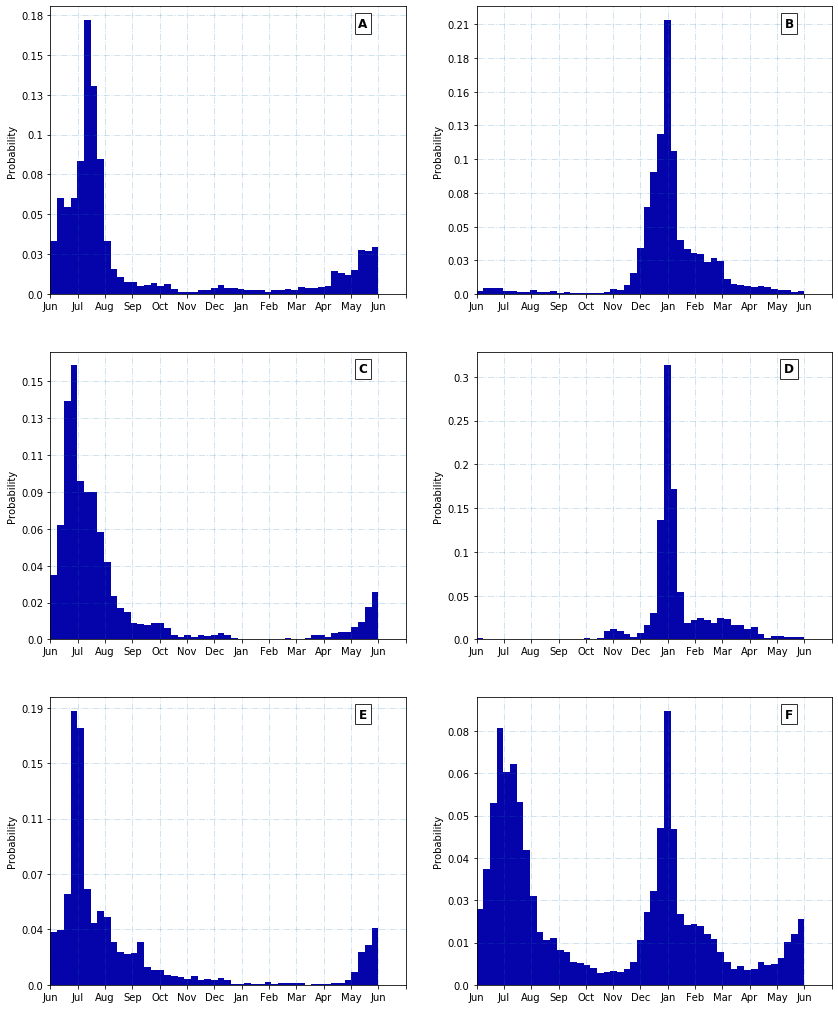

In [10]:
#set style of histogram background
#import seaborn as sns
#sns.set()

#initialize subplot axes: 
fig, axes = plt.subplots(3, 2, figsize=(14,18))
subplot_label = ['A', 'B', 'C', 'D', 'E', 'F']

#initialize variables 
hist_data = {}
hist_data = {'location': [], 'freq': [], 'bins': []}
location = ['Indian_ocean', 'North_pacific', 'South_pacific', 'North_atlantic', 'South_atlantic', 'World_oceans']
#x_ticks = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
x_ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

#set color:
color = 'tab:blue'

#flatten each regional wsp annual phase constant 2D array 
wsp_flat_nind = np.ma.asarray(n_indian).compressed()
wsp_flat_sind = np.ma.asarray(s_indian).compressed()
wsp_flat_ind = np.ma.concatenate([wsp_flat_nind, wsp_flat_sind])
wsp_flat_np = np.ma.asarray(n_pacific).compressed()
wsp_flat_sp = np.ma.asarray(s_pacific).compressed()
wsp_flat_na = np.ma.asarray(n_atlantic).compressed()
wsp_flat_saw = np.ma.asarray(s_atlantic_w).compressed()
wsp_flat_sae = np.ma.asarray(s_atlantic_e).compressed()
wsp_flat_sa = np.ma.concatenate([wsp_flat_saw, wsp_flat_sae])
wsp_flat_w = np.ma.asarray(wsp_phase1_m).compressed()

#place each compressed wsp into a list
wsp_reg_hist = [wsp_flat_ind, wsp_flat_np, wsp_flat_sp, wsp_flat_na, wsp_flat_sa, wsp_flat_w]

#plot histogram  
for iaxis in range(0,6,1): 
    
    #call axis 
    ax_grid = axes.flatten()[iaxis]
    
    #Plot probability histogram (not probability density):
    cs = ax_grid.hist(wsp_reg_hist[iaxis], bins=np.linspace(-np.pi,np.pi,50), color='#0504aa', alpha=1, rwidth=1)
    #ax_grid.set_xlabel('')
    ax_grid.set_ylabel('Probability')
    ax_grid.set_xlim([-np.pi, np.pi])
    ax_grid.set_xticklabels(x_ticks)
    ax_grid.set_yticklabels(np.round(ax_grid.get_yticks()/len(wsp_reg_hist[iaxis]), decimals=2))
    start, end = ax_grid.get_xlim()
    ax_grid.xaxis.set_ticks(np.arange(start, end+1, np.pi/6))
    ax_grid.grid(color=color, linestyle='-.', linewidth=1, alpha = 0.2)
    cart.subplot_label(ax_grid, xdist_label = 0.88, ydist_label = 0.94, 
                           subplot_label = subplot_label[iaxis], fs_shade = 28, fs_main = 12)
    
    #save the frequency data and bin boundaries
    hist_data['location'].append(location[iaxis])
    hist_data['freq'].append(cs[0])
    hist_data['bins'].append(cs[1])
    
#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/swa_frac_ocean/hist_partitioned_ocean', bbox_inches = 'tight', dpi=300)


Difference between Probability and Probability Density:

1) Probability of a single bin: P = amount of observations in bin/ total amount of observations

    a) Probability must not exceed 1

2) Probability density of a single bin: PD = amount of observations in bin/ (total amount of observations) * (width of bin)
    
    a) Probability Density may exceed 1

Tutorial with Bia 

hist, bin_edges = np.histogram(wsp_flat_ind, bins=np.linspace(-np.pi,np.pi,30), density=False)

print(hist.shape,bin_edges.shape)

plt.bar(bin_edges[:-1],hist)

print(hist.sum()*0.1)
print(bin_edges)

print(hist/hist.sum())
print(wsp_flat_ind.shape)

Methodology for computing the fraction of earth which is out of phase with the surrounding hemisphere: 

1) Method 1: Southern and Northern Hemisphere partitioning

    a) Consider the Northern and Southern Hemisphere separately 
    
    b) Partition each Hemisphere into three sections in order to account for the equatorial regions complex phase boundary 
    
    c) Taking each partition, preform the following operation: 
        
        i) Consider data only from the 5 regions: Indian Ocean, North Atlantic, South Atlantic, North Pacific, South Pacific
        
        ii) Consider histograms within each partitioned region above and compute the mean and standard deviation from the hemisphere where the highest mode is. 
        
        ii) Look for all data points that greater by pi +- pi/ (or 6 months) from the phase of the hemisphere
        
        iii) Count the amount of data that are out of phase 
        
2) Method 2: Post partitioning of the world 

    a) Consider the entire globe and look for all points that are: 
        
        i) Southern Hemisphere SWA Regions: 1.5< phi <0 (phase constants in-phase with Northern Hemisphere)
        
        ii) Northern Hemisphere SWA Regions: -1.5< phi <-pi (phase constants in-phase with Northern Hemisphere)
        

Compute fraction of world oceans experiencing wind anomalies

In [17]:
#initialize variables
swa_count = 0

#loop through each partition region to compute the amount of data point that are considered anomalous
for ireg in range(0,5,1): 
    
    #call data 
    loc = hist_data['location'][ireg]
    freq = hist_data['freq'][ireg]
    bins = hist_data['bins'][ireg]

    #case 1: Northern Hemisphere 
    if loc == 'North_pacific' or loc == 'North_atlantic':

        #find bins where phase values are set by northern hemisphere storms (phase = 0 to pi/2)
        #case 1: restrictive criteria 
        #bin_lower = bins<=(-np.pi/2)
        #bin_upper = bins>=(2*np.pi/3)
        #case 2: non-restrictive criteria
        bin_lower = bins<(0)
        bin_upper = bins>(np.pi/2)
        bin_lim = bin_lower | bin_upper
        bin_lim = bin_lim[0:len(bin_lim)-1]

        #apply indices to frequency data
        freq_n = freq[bin_lim]
        
        #count amount of anomalous points
        swa_count = swa_count + np.sum(freq_n)

    #case 2: Southern Hemisphere 
    elif loc == 'Indian_ocean' or 'South_pacific' or 'South_atlantic': 

        #find bins where phase values are set by northern hemisphere storms (phase = 0 to pi/2)
        #case 1: restrictive criteria
        #bin_lower = bins>= -np.pi/4
        #bin_upper = bins<=(np.pi/2)
        #case 2: non-restrictive criteria
        bin_upper = bins>=-np.pi/2
        bin_lim = bin_upper
        bin_lim = bin_lim[0:len(bin_lim)-1]

        #apply indices to frequency data
        freq_n = freq[bin_lim]

        #count amount of anomalous points
        swa_count = swa_count + np.sum(freq_n)

#find the totoal amount of observations over the world oceans for phase
obs_tot = np.sum(hist_data['freq'][5])

#compute fraction of world oceans experiencing wind anomaly 
swa_tot = swa_count/obs_tot


SWA statistics

In [94]:
print('Fraction of world ocean experiencing anomalous surface winds')
print(swa_tot*100)
frac = np.round(swa_tot*100, decimals=1)
#print('Fraction of world ocean closer than 550km (5 degrees of longitude) from shore experiencing anomalous surface winds')
#print(swa_coast)
#print('Fraction of world ocean further than 550km from shore experiencing anomalous surface winds')
#print(swa_open)

Fraction of world ocean experiencing anomalous surface winds
16.437565845582704


Plot maps of hemisphere where wind anomalies are occuring 

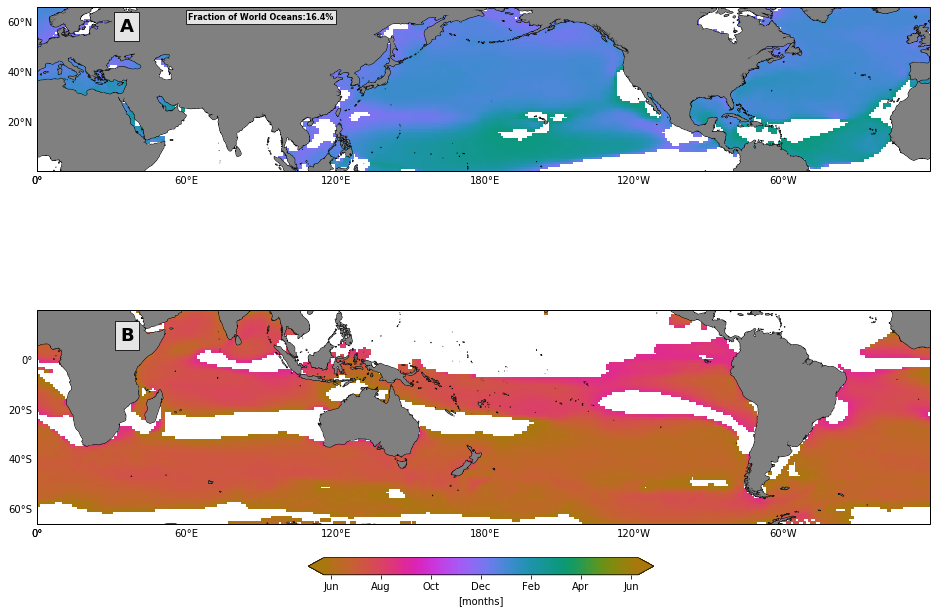

In [98]:
#case 1: restrictive case
#mask all values not in phase with northern hemisphere strom system patterns
#wsp_nh_phase1 = np.ma.masked_inside(wsp_phase1_m, -np.pi, -np.pi/2)
#wsp_nh_phase = np.ma.masked_greater_equal(wsp_nh_phase1, 2*np.pi/3)

#mask all values not in phase with southern hemisphere strom system patterns
#wsp_sh_phase = np.ma.masked_inside(wsp_phase1_m, -np.pi/4, np.pi/2)

#case 2: non-restrictive case
#mask all values not in phase with northern hemisphere strom system patterns
wsp_nh_phase1 = np.ma.masked_less(wsp_phase1_m, 0)
wsp_nh_phase = np.ma.masked_greater(wsp_nh_phase1, np.pi/2)

#mask all values not in phase with southern hemisphere strom system patterns
wsp_sh_phase = np.ma.masked_greater(wsp_phase1_m, -np.pi/2)

#Plot North hemisphere phase regions
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '50m'

fig, axes = plt.subplots(2,1, figsize=(16,12),
                        subplot_kw={'projection': projection})
ax1, ax2 = axes.flatten()

############## Subplot 1  #################
cart.set_subplots(ax1, projection, resolution, lon_min=-180, lon_max=179, lat_min=0, lat_max=66)
cs1 = ax1.pcolor(lon, lat, wsp_nh_phase, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax1, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [0, 20, 40, 60], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cax1 = plt.axes([.36, .13, 0.3, 0.02])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[months]', nbins = 7, fontsize = 10, cbar_ticks=[np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),['','Jun', 'Aug', 'Oct', 'Dec', 'Feb', 'Apr', 'Jun']], task='custom ticks')
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)
cart.subplot_label(ax1, xdist_label = 0.25, ydist_label = 0.94, subplot_label = 'Fraction of World Oceans:''%s' %frac + '%' , fs_shade = 28, fs_main = 8)

############## Subplot 2  #################
cart.set_subplots(ax2, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=20)
cs2 = ax2.pcolor(lon, lat, wsp_sh_phase, vmin=-np.pi, vmax=np.pi, cmap=cmo.phase, 
                 transform=ccrs.PlateCarree(central_longitude=0.0))
cart.set_grid_labels(ax2, xticks = [0, 60, 120, 180, -120, -60, -0], yticks = [-60, -40, -20, 0, 20], 
                     xgrid = False, ygrid = False, fontsize=10, color = 'black')
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/swa_frac_ocean/anomalous_regions', bbox_inches = 'tight', dpi=300)


Apply masks onto partitioned wsp phase maps

In [71]:
#mask all values not in phase with their hemisphere's strom system patterns
###### Indian Ocean #######
n_indian_m = np.ma.masked_greater(n_indian, -np.pi/2)
s_indian_m = np.ma.masked_greater(s_indian, -np.pi/2)
###### Pacific Ocean #######
n_pacific1 = np.ma.masked_less(n_pacific, 0)
n_pacific_m = np.ma.masked_greater(n_pacific1, np.pi/2)
s_pacific_m = np.ma.masked_greater(s_pacific, -np.pi/2)
###### Atlantic Ocean #######
n_atlantic1 = np.ma.masked_less(n_atlantic, 0)
n_atlantic_m = np.ma.masked_greater(n_atlantic1, np.pi/2)
s_atlantic_w_m = np.ma.masked_greater(s_atlantic_w, -np.pi/2)
s_atlantic_e_m =np.ma.masked_greater(s_atlantic_e, -np.pi/2)

Add in the rest of the world oceans

In [92]:
europe = wsp_phase1_m[90:133,0:55]
pacific_eq = wsp_phase1_m[60:76,106:280]
atlantic_eq = wsp_phase1_m[67:78,283:360]
west_africa = wsp_phase1_m[67:133,0:50]
west_europe = wsp_phase1_m[90:133,353:360]
caribbean = wsp_phase1_m[76:78,275:284]
coast = wsp_phase1_m[63:73,279:283]

Inspect the region that will be plotted as a histogram

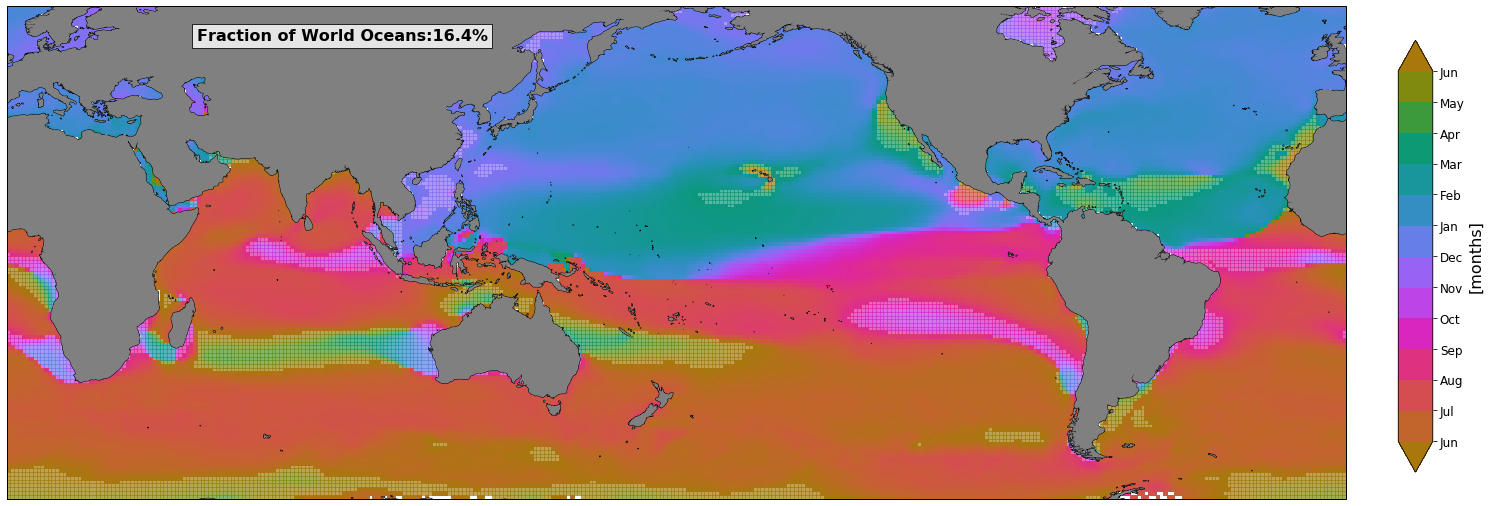

In [96]:
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '50m'

fig, axes = plt.subplots(1,1, figsize=(24,20),
                        subplot_kw={'projection': projection})
#make the phase map discrete 
cmap = cmo.phase  #define the colormap
# extract all colors from the .phase map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-np.pi, np.pi, 15)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

############## Partitioned World Oceans  ################# 
cart.set_subplots(axes, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
cart.subplot_label(axes, xdist_label = 0.25, ydist_label = 0.94, 
                   subplot_label = 'Fraction of World Oceans:''%s' %frac + '%' , fs_shade = 28, fs_main = 16)
#entire world 
cs1 = axes.pcolor(lon, lat, wsp_phase1_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, alpha=0.7, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))

#North indian ocean
lat_reg = lat[59:95]
lon_reg = lon[40:105]
cs1 = axes.pcolor(lon_reg, lat_reg, n_indian_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#South Indian Ocean 
lat_reg = lat[0:60]
lon_reg = lon[23:132]
cs2 = axes.pcolor(lon_reg, lat_reg, s_indian_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#north pacific
lat_reg = lat[75:133]
lon_reg = lon[106:275]
cs3 = axes.pcolor(lon_reg, lat_reg, n_pacific_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#south pacific
lat_reg = lat[0:60]
lon_reg = lon[131:292]
cs4 = axes.pcolor(lon_reg, lat_reg, s_pacific_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#North Atlantic
lat_reg = lat[77:133]
lon_reg = lon[274:355]
cs5 = axes.pcolor(lon_reg, lat_reg, n_atlantic_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#South Atlantic West
lat_reg = lat[0:68]
lon_reg = lon[291:360]
cs6 = axes.pcolor(lon_reg, lat_reg, s_atlantic_w_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#South Atlantic East
lat_reg = lat[0:68]
lon_reg = lon[0:24]
cs7 = axes.pcolor(lon_reg, lat_reg, s_atlantic_e_m, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
######### Fill in the rest of the world ##########
#Europe East 
lat_reg = lat[90:133]
lon_reg = lon[0:55]
cs7 = axes.pcolor(lon_reg, lat_reg, europe, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#West Africa
lat_reg = lat[67:133]
lon_reg = lon[0:50]
cs7 = axes.pcolor(lon_reg, lat_reg, west_africa, vmin=-np.pi, vmax=np.pi, cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#Pacific Equator 
lat_reg = lat[59:76]
lon_reg = lon[106:280]
cs7 = axes.pcolor(lon_reg, lat_reg, pacific_eq, vmin=-np.pi, vmax=np.pi, cmap=cmap,
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#Atlantic Equator
lat_reg = lat[67:78]
lon_reg = lon[283:360]
cs7 = axes.pcolor(lon_reg, lat_reg, atlantic_eq, vmin=-np.pi, vmax=np.pi,cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#Caribbean
lat_reg = lat[76:78]
lon_reg = lon[275:284]
cs7 = axes.pcolor(lon_reg, lat_reg, caribbean, vmin=-np.pi, vmax=np.pi,cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#Coast rica 
lat_reg = lat[63:73]
lon_reg = lon[279:283]
cs7 = axes.pcolor(lon_reg, lat_reg, coast, vmin=-np.pi, vmax=np.pi,cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))

#Europe West 
lat_reg = lat[90:133]
lon_reg = lon[353:360]
cs7 = axes.pcolor(lon_reg, lat_reg, west_europe, vmin=-np.pi, vmax=np.pi,cmap=cmap, 
                  transform=ccrs.PlateCarree(central_longitude=0.0))
#set colormap
ax2 = fig.add_axes([0.93, 0.35, 0.02, 0.3])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
                                      spacing='proportional', ticks=bounds, boundaries=bounds, extend='both', 
                                      extendfrac='auto', orientation='vertical')

cb.ax.set_ylabel('[months]', fontsize=16)
cb.ax.set_yticklabels(['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
cb.ax.tick_params(labelsize=12) 

#cart.subplot_label(axes, xdist_label = 0.04, ydist_label = 0.54, subplot_label = 'A', fs_shade = 28, fs_main = 18)
#cart.subplot_label(axes, xdist_label = 0.62, ydist_label = 0.86, subplot_label = 'B', fs_shade = 28, fs_main = 18)
#cart.subplot_label(axes, xdist_label = 0.32, ydist_label = 0.33, subplot_label = 'C', fs_shade = 28, fs_main = 18)
#cart.subplot_label(axes, xdist_label = 0.74, ydist_label = 0.9, subplot_label = 'D', fs_shade = 28, fs_main = 18)
#cart.subplot_label(axes, xdist_label = 0.8, ydist_label = 0.4, subplot_label = 'E', fs_shade = 28, fs_main = 18)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/swa_frac_ocean/partitioned_ocean_anomaly', bbox_inches = 'tight', dpi=300)


### Developmental Code 

In [15]:
wsp_phase_test = np.ma.asarray(wsp_phase1_m)
type(wsp_phase_test)
test = wsp_phase_test.compressed()
print(test.shape)

(47880,)


In [37]:
print(np.ma.asarray(wsp_phase1_m).shape)


(133, 360)


In [11]:
s_atlantic = wsp_phase1_m[1:10,10:20]
print(s_atlantic.shape)

(9, 10)


In [67]:
 wsp_phase1_m.shape

(133, 360)

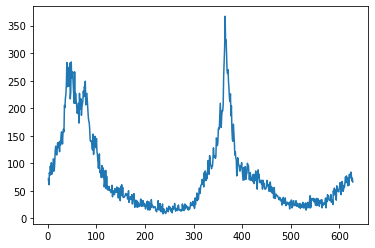

In [22]:
plt.plot(np.arange(1,len(cs[0])+1), cs[0])

In [30]:
print(hist_data['location'][2])

South_pacific


In [11]:
test_1 = hist_data['bins'][1]>= 0
test_2 = hist_data['bins'][1]<=(np.pi/2)
test = test_1 * test_2
test = test[0:len(test)-1]
print(test.shape)

test_hist = hist_data['freq'][1]

print(test_hist[test])

(628,)
[ 30.  25.  32.  31.  28.  24.  40.  33.  43.  42.  43.  40.  39.  54.
  61.  47.  43.  67.  53.  57.  54.  53.  59.  48.  57.  73.  69.  79.
  65.  64.  65.  85.  88.  64.  73.  89.  90.  82.  63.  93.  78.  67.
  90.  95.  94. 110. 125. 143. 156. 181. 125. 136. 133. 137. 143. 127.
 117. 130.  94. 105. 112.  95. 104.  66.  44.  47.  53.  50.  51.  40.
  43.  40.  46.  32.  29.  36.  40.  34.  42.  35.  47.  34.  33.  35.
  38.  43.  30.  29.  36.  20.  26.  37.  23.  24.  30.  28.  34.  30.
  24.  18.  21.  24.  22.  21.  20.  28.  27.  24.  21.  19.  22.  13.
  26.  22.  18.  16.  26.  33.  25.  30.  26.  15.  17.  24.  21.  22.
  16.  13.  18.  22.  17.  20.  13.  22.  20.  19.  19.  20.  25.  19.
  17.  18.  19.  18.  22.  26.  23.  23.  27.  15.  29.  21.  18.  21.
  17.  23.  21.]


In [38]:
np.sum(test_hist[test])

7493.0

In [12]:
len(test)

628

In [24]:
np.pi/2

1.5707963267948966

In [29]:
print(obs_tot)

35827.0


In [50]:
print(wsp_phase1_m.shape)

(35849,)


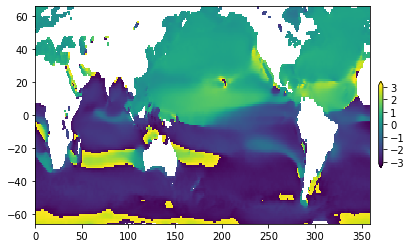

In [13]:
swh_phase = np.ma.masked_equal(swh_phase1_m, 0)
cs = plt.pcolor(lon, lat, wsp_phase1_m)
cax = plt.axes([.92, .32, 0.01, 0.3])
cart.set_cbar(cs, cax, fig, orientation='vertical', cbar_label ='', nbins = 7, fontsize = 10, cbar_ticks=[], task='regular')


In [51]:
swh_mask.shape

(133, 360)

In [38]:
3*np.pi/4

2.356194490192345

In [25]:
2*np.pi

6.283185307179586

In [25]:
sns.set?

range(0, 10)

In [65]:
bounds = np.linspace(-np.pi, np.pi, 15)
print(bounds)
diff = np.diff(bounds)
print(diff)
print('')
print(diff/2)

[-3.14159265 -2.61799388 -2.0943951  -1.57079633 -1.04719755 -0.52359878
  0.          0.52359878  1.04719755  1.57079633  2.0943951   2.61799388
  3.14159265]
[0.52359878 0.52359878 0.52359878 0.52359878 0.52359878 0.52359878
 0.52359878 0.52359878 0.52359878 0.52359878 0.52359878 0.52359878]

[0.26179939 0.26179939 0.26179939 0.26179939 0.26179939 0.26179939
 0.26179939 0.26179939 0.26179939 0.26179939 0.26179939 0.26179939]


In [67]:
cmap = plt.cm.hsv 
print(cmap)
cmap2 = cmo.phase
print(cmap2)